In [2]:
# Import, one hot encode, sparse matrix
# Then kmeans for clusters to see if we can use this to fill missing superpopulation data

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

# Load the dataset
file_path = './Resources/kidd_combined.csv'
data = pd.read_csv(file_path, delimiter=',')

# Replace missing values with 'NN'
data_filled = data.fillna('NN')

# Define non-SNP columns by name
non_snp_columns = ['id', 'gender', 'superpopulation']

# Select SNP columns
snp_columns = [col for col in data.columns if col not in non_snp_columns]

# One-Hot Encode the SNP columns
X_encoded = pd.get_dummies(data_filled[snp_columns], drop_first=True)

# Convert to sparse matrix = this can be deleted if unneccessary 
sparse_matrix = csr_matrix(X_encoded.values)

# Standardize the data
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(sparse_matrix)

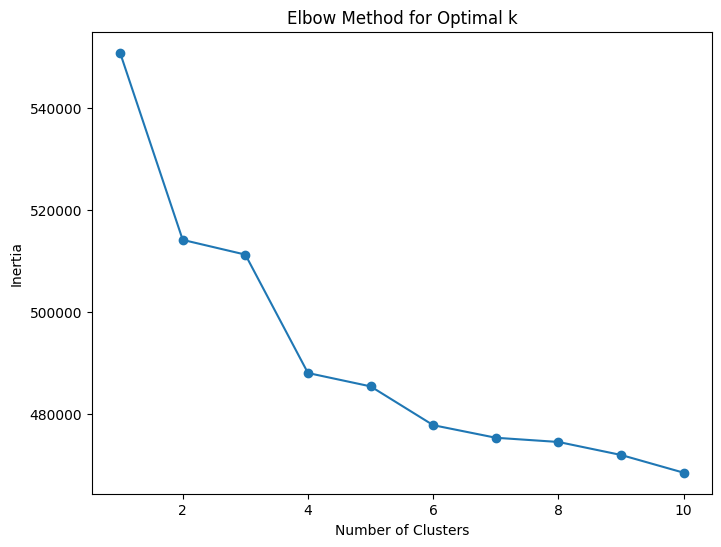

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate the sum of squared distances for a range of cluster numbers
inertia = []
k_range = range(1, 11)  # Testing cluster numbers from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [6]:
# Choose the optimal number of clusters
optimal_k = 5  # Example: Replace with the value determined from the Elbow Method

# Apply KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
data['Cluster'] = kmeans.labels_

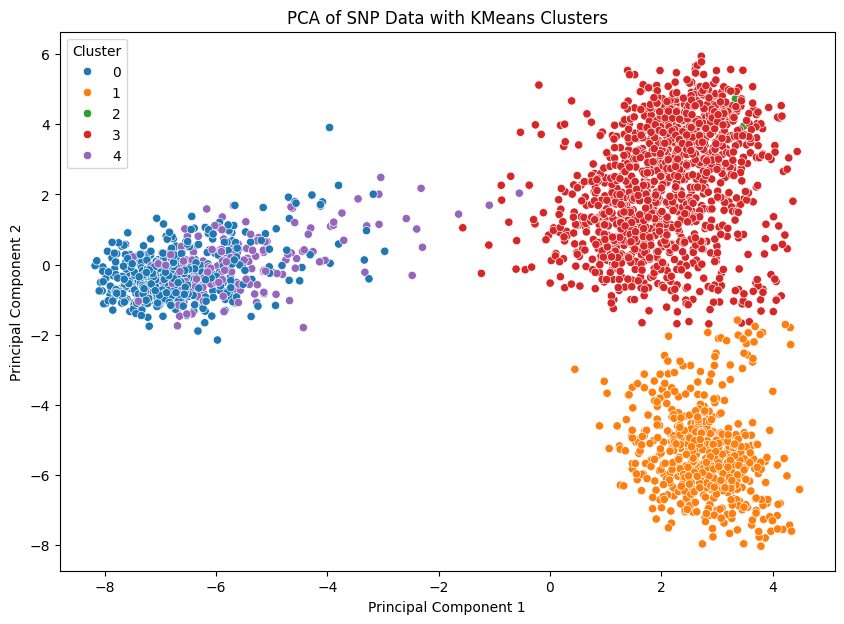

In [7]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data['Cluster']

# Plot the PCA results colored by cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', marker='o')
plt.title('PCA of SNP Data with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()